In [1]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
import random

## 0.1 - test gratings

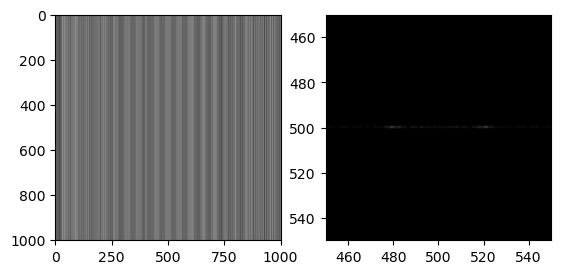

In [2]:
###  set up 2-d grid for grating 

x = np.linspace(-1.25,1.25,1001)
y = np.linspace(-.75,.75,1001)

X, Y = np.meshgrid(x, y)     ## 2D function

lamda = 200e-6

grating = np.sin(2*np.pi*X/lamda)   ### k = spatial freq = 2pi/lambda
plt.set_cmap("gray")

plt.subplot(121)
plt.imshow(grating)

# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)   ##useful for visualizing a Fourier transform with the zero-frequency component in the middle of the spectrum. 
ft = np.fft.fft2(ft)        #calculates the 2D Fourier transform 
ft = np.fft.fftshift(ft)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([450, 550])
plt.ylim([550, 450])
plt.show()

# Section 1 - Simulate slits and their fourier patterns

## 1.1 - Single Slit

In [3]:
## create single slit 

def single_slit(D,h):
    ## D = slit width (m), h = slit height (m)

    slit = (np.abs(X)< D/2)*(np.abs(Y)<h)
    return slit.astype(float)    ## convert from boolean to numbers

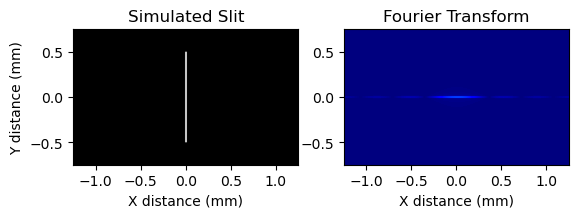

In [4]:
## plot single slit width 0.2mm

slit_width_2mm = single_slit(.02,.5)

plt.subplot(1,2,1)
plt.imshow(slit_width_2mm,extent=[-1.25,1.25,-0.75,0.75])
plt.title('Simulated Slit')
plt.xlabel('X distance (mm)')
plt.ylabel('Y distance (mm)')

# Calculate Fourier transform of single slit
ft = np.fft.ifftshift(slit_width_2mm)   ##useful for visualizing a Fourier transform with the zero-frequency component in the middle of the spectrum. 
ft = np.fft.fft2(ft)                    ##calculates the 2D Fourier transform 
ft_ss_2 = np.fft.fftshift(ft)

plt.subplot(1,2,2)
plt.imshow(np.abs(ft_ss_2),extent=[-1.25,1.25,-0.75,0.75], cmap='jet')
#plt.ylim(0.2,-0.2)
plt.title('Fourier Transform')
plt.xlabel('X distance (mm)')
plt.ylabel('Y distance (mm)')
plt.show()

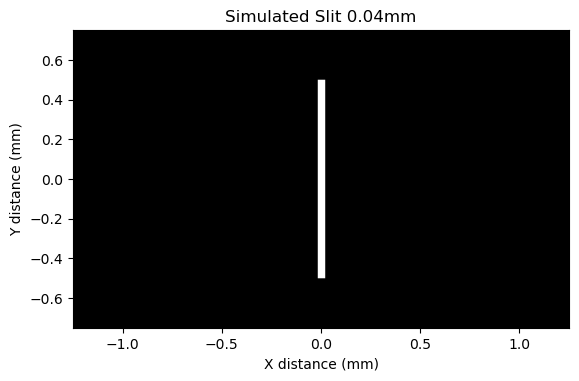

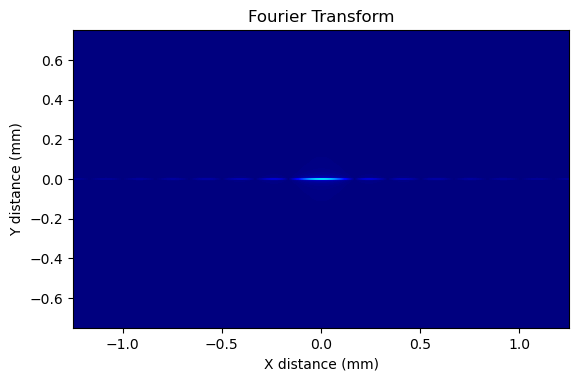

In [5]:
## plot single slit width 0.04mm

slit_width_2mm = single_slit(.04,.5)

plt.imshow(slit_width_2mm,extent=[-1.25,1.25,-0.75,0.75])
plt.title('Simulated Slit 0.04mm')
plt.xlabel('X distance (mm)')
plt.ylabel('Y distance (mm)')
plt.show()

# Calculate Fourier transform of single slit
ft = np.fft.ifftshift(slit_width_2mm)   ##useful for visualizing a Fourier transform with the zero-frequency component in the middle of the spectrum. 
ft = np.fft.fft2(ft)        #calculates the 2D Fourier transform 
ft_ss_4 = np.fft.fftshift(ft)

plt.imshow(np.abs(ft_ss_4),extent=[-1.25,1.25,-0.75,0.75], cmap='jet')
plt.title('Fourier Transform')
plt.xlabel('X distance (mm)')
plt.ylabel('Y distance (mm)')
plt.show()

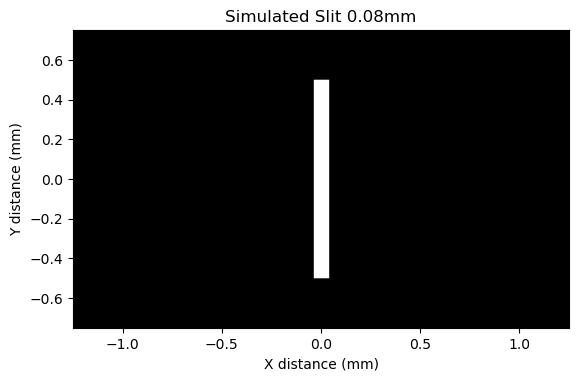

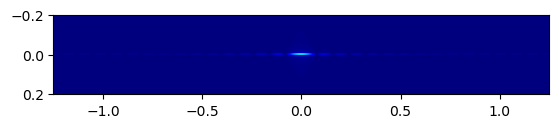

In [6]:
## plot single slit width 0.04mm

slit_width_8mm = single_slit(.08,.5)

plt.imshow(slit_width_8mm,extent=[-1.25,1.25,-0.75,0.75])
plt.title('Simulated Slit 0.08mm')
plt.xlabel('X distance (mm)')
plt.ylabel('Y distance (mm)')
plt.show()

# Calculate Fourier transform of single slit
ft = np.fft.ifftshift(slit_width_8mm)   ##useful for visualizing a Fourier transform with the zero-frequency component in the middle of the spectrum. 
ft = np.fft.fft2(ft)        #calculates the 2D Fourier transform 
ft_ss_8 = np.fft.fftshift(ft)

plt.imshow(np.abs(ft_ss_8),extent=[-1.25,1.25,-0.75,0.75],cmap='jet')
#plt.xlim(350,650)
plt.ylim(0.2,-0.2)
plt.show()

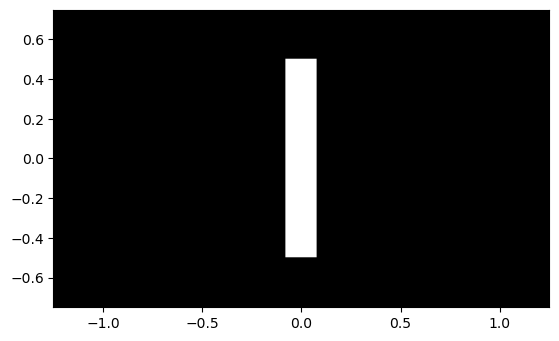

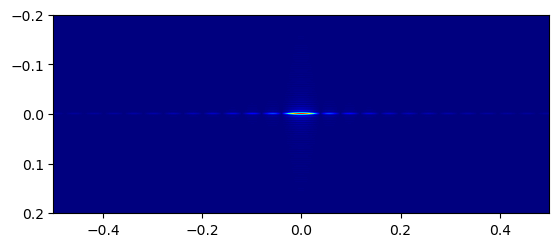

In [7]:
## plot single slit width 0.16mm

slit_width_16mm = single_slit(.16,.5)

plt.imshow(slit_width_16mm,extent=[-1.25,1.25,-0.75,0.75])
plt.show()

# Calculate Fourier transform of single slit
ft = np.fft.ifftshift(slit_width_16mm)   ##useful for visualizing a Fourier transform with the zero-frequency component in the middle of the spectrum. 
ft = np.fft.fft2(ft)        #calculates the 2D Fourier transform def
ft_ss_16 = np.fft.fftshift(ft)

plt.imshow(np.abs(ft_ss_16),extent=[-1.25,1.25,-0.75,0.75],cmap='jet')
plt.ylim(0.2,-0.2)
plt.xlim(-0.5,0.5)
plt.show()

In [8]:
x = np.linspace(-1.25,1.25,1001)

In [101]:
hs = np.arange(-0.7,0.7,.001)

In [10]:
def sinc(h,f,a):
    
    top = np.sin((np.pi*h*a)/((450e-6)*f))
    bottom = (np.pi*h*a)/((450e-6)*f)
    
    return top/bottom

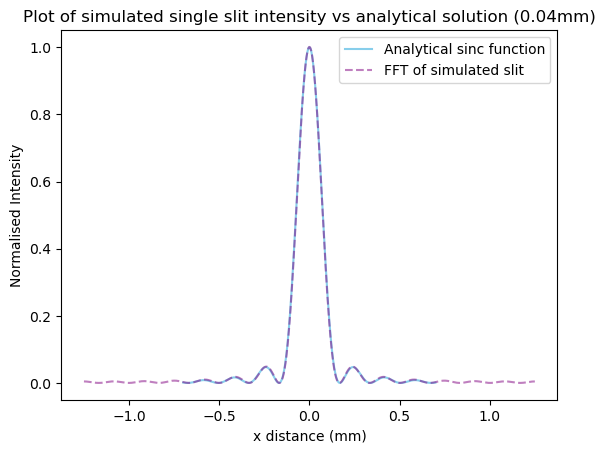

In [58]:
plt.plot(hs,sinc(hs,15,0.04)**2,color='skyblue',label='Analytical sinc function')
plt.plot(x,np.abs(ft_ss_4)[500]**2/1e8,'--',alpha=0.5,color='purple',label='FFT of simulated slit')
#plt.plot(x,np.abs(get_U(ft_ss_4,d,k)[500]**2/np.max(np.abs(get_U(ft_ss_4,d,k)[500]**2))),label='fft of simulated slit')

plt.title('Plot of simulated single slit intensity vs analytical solution (0.04mm)')
plt.xlabel('x distance (mm)')
plt.ylabel('Normalised Intensity')
plt.legend()

In [34]:
def xmin(n,a):
    xmins = (n*450e-6*15)/0.02
    return xmins

In [36]:
n = [-3,-2,-1,1,2,3]

In [37]:
xmin(np.array(n),0.02)

array([-1.0125, -0.675 , -0.3375,  0.3375,  0.675 ,  1.0125])

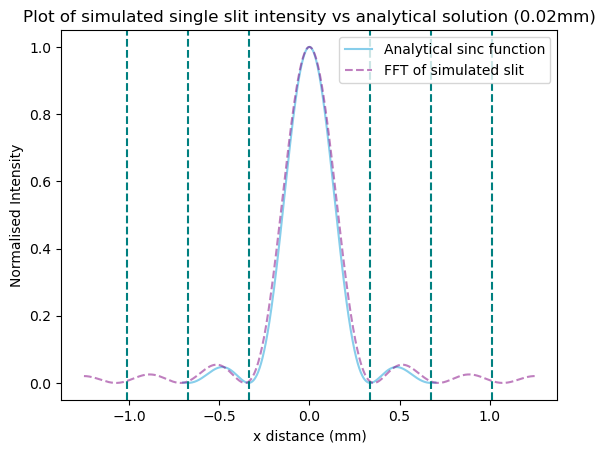

In [63]:
plt.plot(hs,sinc(hs,15,0.02)**2,color='skyblue',label='Analytical sinc function')
plt.plot(x,np.abs(ft_ss_2)[500]**2/np.max(np.abs(ft_ss_2)[500]**2),'--',alpha=0.5,color='purple',label='FFT of simulated slit')
[plt.axvline(x,ls='--',color='teal')for x in xmin(np.array(n),0.02)]

plt.title('Plot of simulated single slit intensity vs analytical solution (0.02mm)')
plt.xlabel('x distance (mm)')
plt.ylabel('Normalised Intensity')
plt.legend()

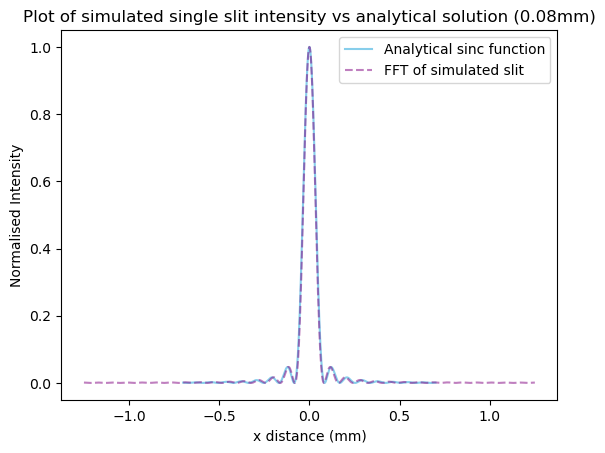

In [54]:
plt.plot(hs,sinc(hs,15,0.08)**2,color='skyblue',label='Analytical sinc function')
plt.plot(x,np.abs(ft_ss_8)[500]**2/np.max(np.abs(ft_ss_8)[500]**2),'--',alpha=0.5,color='purple',label='FFT of simulated slit')

plt.title('Plot of simulated single slit intensity vs analytical solution (0.08mm)')
plt.xlabel('x distance (mm)')
plt.ylabel('Normalised Intensity')
plt.legend()

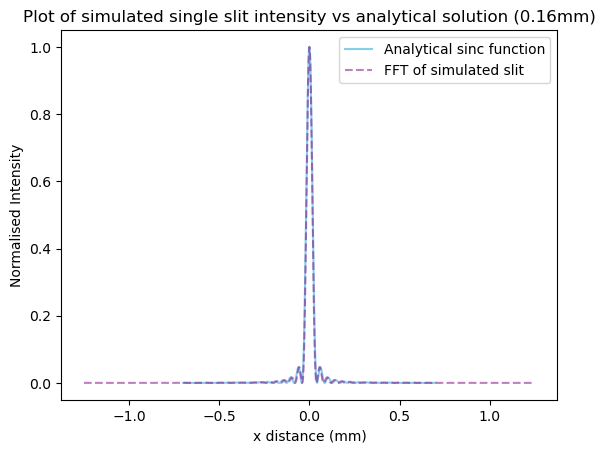

In [56]:
plt.plot(hs,sinc(hs,15,0.16)**2,color='skyblue',label='Analytical sinc function')
plt.plot(x,np.abs(ft_ss_16)[500]**2/np.max(np.abs(ft_ss_16)[500]**2),'--',alpha=0.5,color='purple',label='FFT of simulated slit')

plt.title('Plot of simulated single slit intensity vs analytical solution (0.16mm)')
plt.xlabel('x distance (mm)')
plt.ylabel('Normalised Intensity')
plt.legend()

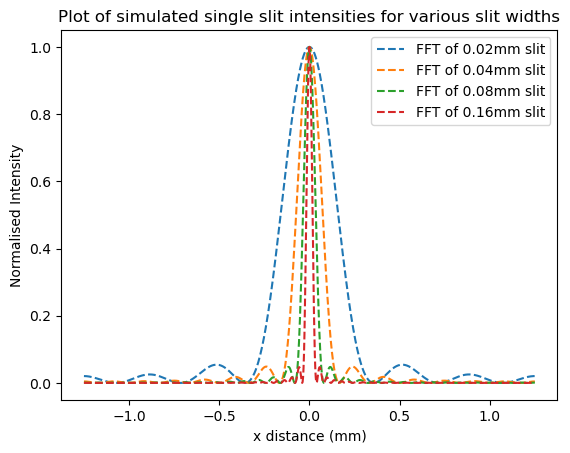

In [59]:
plt.plot(x,np.abs(ft_ss_2)[500]**2/np.max(np.abs(ft_ss_2)[500]**2),'--',label='FFT of 0.02mm slit')
plt.plot(x,np.abs(ft_ss_4)[500]**2/np.max(np.abs(ft_ss_4)[500]**2),'--',label='FFT of 0.04mm slit')
plt.plot(x,np.abs(ft_ss_8)[500]**2/np.max(np.abs(ft_ss_8)[500]**2),'--',label='FFT of 0.08mm slit')
plt.plot(x,np.abs(ft_ss_16)[500]**2/np.max(np.abs(ft_ss_16)[500]**2),'--',label='FFT of 0.16mm slit')

plt.title('Plot of simulated single slit intensities for various slit widths')
plt.xlabel('x distance (mm)')
plt.ylabel('Normalised Intensity')
plt.legend()

## 1.2 - Double slit

In [21]:
## create double slit 
def double_slit(D,dx,h):
    ## D = slit width (mm), h = slit height (mm), dx = distance between slits
    
    a = dx/2 < np.abs(X)
    b = np.abs(X) < dx/2+D
    xs = np.logical_and(a, b)    ## enforce both conditions on x 

    slits = (xs)*(np.abs(Y)<h)
    return slits.astype(float)    ## convert from boolean to numbers

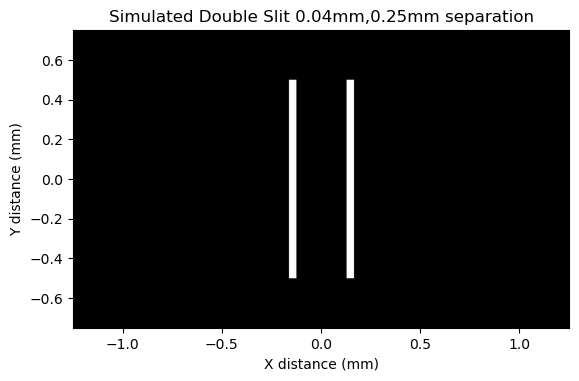

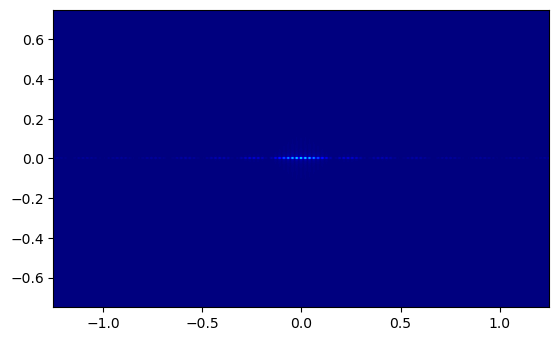

In [22]:
## plot double slit width A

double_slit_02mm = double_slit(.04,.25,.5)

plt.imshow(double_slit_02mm,extent=[-1.25,1.25,-0.75,0.75])
plt.title('Simulated Double Slit 0.04mm,0.25mm separation')
plt.xlabel('X distance (mm)')
plt.ylabel('Y distance (mm)')
plt.show()

# Calculate Fourier transform of single slit
ft = np.fft.ifftshift(double_slit_02mm)   ##useful for visualizing a Fourier transform with the zero-frequency component in the middle of the spectrum. 
ft = np.fft.fft2(ft)        #calculates the 2D Fourier transform 
ft_ss_02 = np.fft.fftshift(ft)

plt.imshow(np.abs(ft_ss_02),extent=[-1.25,1.25,-0.75,0.75],cmap='jet')
plt.show()

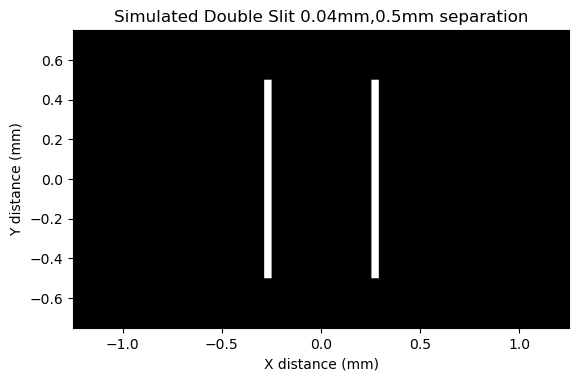

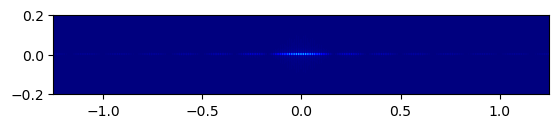

In [23]:
## plot double slit width B

double_slit_04mm = double_slit(.04,.5,.5)

plt.imshow(double_slit_04mm,extent=[-1.25,1.25,-0.75,0.75])
plt.title('Simulated Double Slit 0.04mm,0.5mm separation')
plt.xlabel('X distance (mm)')
plt.ylabel('Y distance (mm)')
plt.show()

# Calculate Fourier transform of single slit
ft = np.fft.ifftshift(double_slit_04mm)   ##useful for visualizing a Fourier transform with the zero-frequency component in the middle of the spectrum. 
ft = np.fft.fft2(ft)        #calculates the 2D Fourier transform 
ft_ss_04 = np.fft.fftshift(ft)

plt.imshow(np.abs(ft_ss_04),extent=[-1.25,1.25,-0.75,0.75],cmap='jet')
plt.ylim(-0.2,0.2)
plt.show()

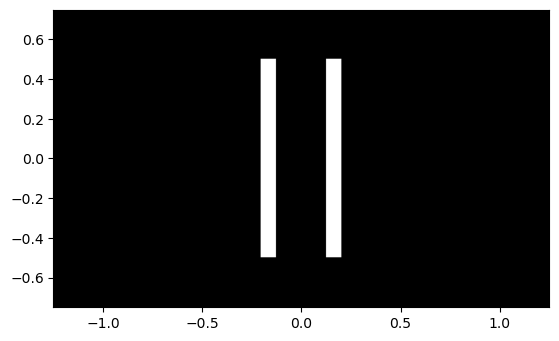

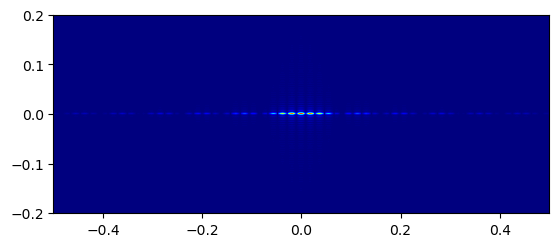

In [24]:
## plot double slit width C

double_slit_08mm = double_slit(.08,.25,.5)

plt.imshow(double_slit_08mm,extent=[-1.25,1.25,-0.75,0.75])
plt.show()

# Calculate Fourier transform of single slit
ft = np.fft.ifftshift(double_slit_08mm)   ##useful for visualizing a Fourier transform with the zero-frequency component in the middle of the spectrum. 
ft = np.fft.fft2(ft)        #calculates the 2D Fourier transform 
ft_ss_08 = np.fft.fftshift(ft)

plt.imshow(np.abs(ft_ss_08),extent=[-1.25,1.25,-0.75,0.75],cmap='jet')
plt.ylim(-0.2,0.2)
plt.xlim(-0.5,0.5)
plt.show()

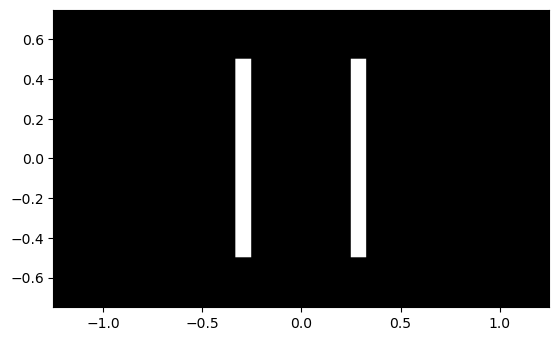

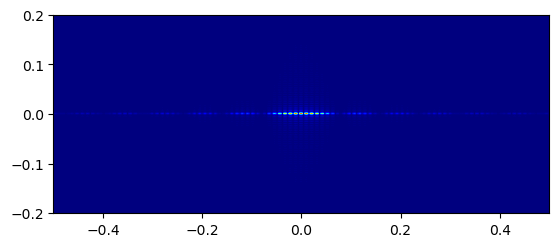

In [25]:
## plot double slit width D

double_slit_16mm = double_slit(.08,.5,.5)

plt.imshow(double_slit_16mm,extent=[-1.25,1.25,-0.75,0.75])
plt.show()

# Calculate Fourier transform of single slit
ft = np.fft.ifftshift(double_slit_16mm)   ##useful for visualizing a Fourier transform with the zero-frequency component in the middle of the spectrum. 
ft = np.fft.fft2(ft)        #calculates the 2D Fourier transform 
ft_ss_82 = np.fft.fftshift(ft)

plt.imshow(np.abs(ft_ss_82),extent=[-1.25,1.25,-0.75,0.75],cmap='jet')
plt.ylim(-0.2,0.2)
plt.xlim(-0.5,0.5)
plt.show()

In [26]:
def double_sinc(a,b,h,f):
    ## b = distance between slits, a = slit width, f = focal length, 
    
    top = np.sin((np.pi*h*a)/((450e-6)*f)) 
    bottom = (np.pi*h*a)/((450e-6)*f)
    cos= np.cos((np.pi*h)/(450e-6*f)*b)
    
    return (top/bottom)*cos

In [27]:
ns = np.arange(-1.5,1.5,0.01)

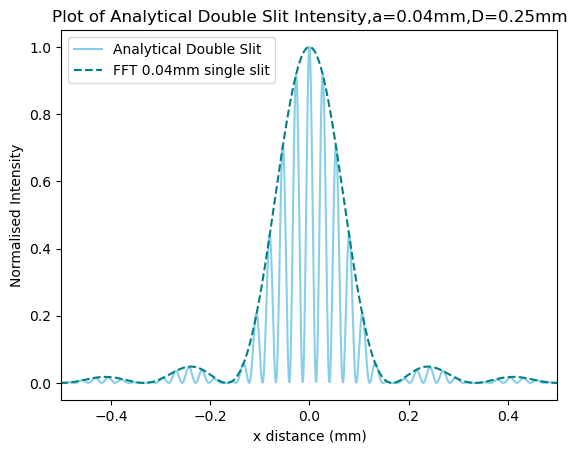

In [78]:
plt.plot(hs,double_sinc(.04,0.25,hs,15)**2,color='skyblue',label='Analytical Double Slit')
#plt.plot(x,np.abs(ft_ss_02)[500]**2/np.max(np.abs(ft_ss_02)[500]**2),'--',alpha=0.5,color='purple',label='FFT simulated slit')
plt.plot(x,np.abs(ft_ss_4)[500]**2/np.max(np.abs(ft_ss_4)[500]**2),'--',color='teal',label='FFT 0.04mm single slit')

plt.title('Plot of Analytical Double Slit Intensity,a=0.04mm,D=0.25mm')
plt.xlabel('x distance (mm)')
plt.ylabel('Normalised Intensity')
plt.xlim(-0.5,0.5)
plt.legend(loc=2)

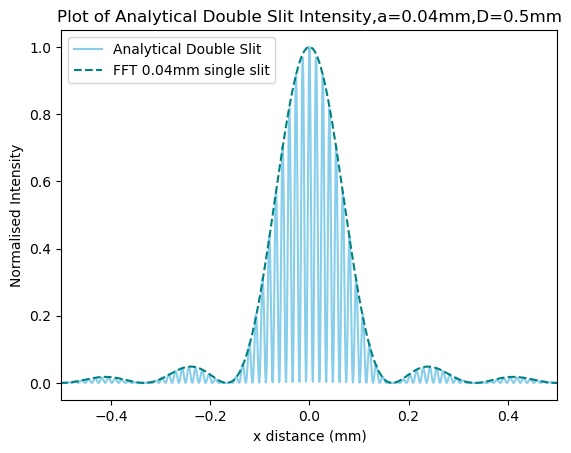

In [84]:
plt.plot(hs,double_sinc(.04,0.5,hs,15)**2,color='skyblue',label='Analytical Double Slit')
#plt.plot(x,np.abs(ft_ss_02)[500]**2/np.max(np.abs(ft_ss_02)[500]**2),'--',alpha=0.5,color='purple',label='FFT simulated slit')
plt.plot(x,np.abs(ft_ss_4)[500]**2/np.max(np.abs(ft_ss_4)[500]**2),'--',color='teal',label='FFT 0.04mm single slit')

plt.title('Plot of Analytical Double Slit Intensity,a=0.04mm,D=0.5mm')
plt.xlabel('x distance (mm)')
plt.ylabel('Normalised Intensity')
plt.xlim(-0.5,0.5)
plt.legend(loc=2)

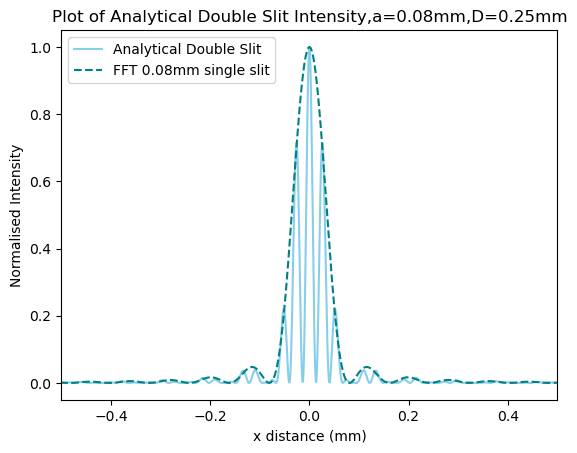

In [83]:
plt.plot(hs,double_sinc(.08,0.25,hs,15)**2,color='skyblue',label='Analytical Double Slit')
plt.plot(x,np.abs(ft_ss_8)[500]**2/np.max(np.abs(ft_ss_8)[500]**2),'--',color='teal',label='FFT 0.08mm single slit')

plt.title('Plot of Analytical Double Slit Intensity,a=0.08mm,D=0.25mm')
plt.xlabel('x distance (mm)')
plt.ylabel('Normalised Intensity')
plt.xlim(-0.5,0.5)
plt.legend(loc=2)

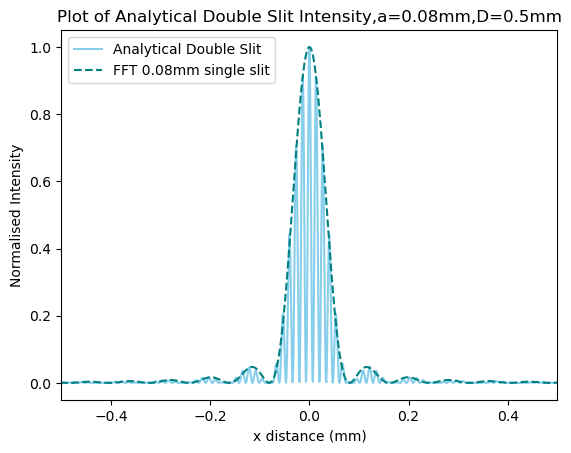

In [82]:
plt.plot(hs,double_sinc(.08,0.5,hs,15)**2,color='skyblue',label='Analytical Double Slit')
plt.plot(x,np.abs(ft_ss_8)[500]**2/np.max(np.abs(ft_ss_8)[500]**2),'--',color='teal',label='FFT 0.08mm single slit')

plt.title('Plot of Analytical Double Slit Intensity,a=0.08mm,D=0.5mm')
plt.xlabel('x distance (mm)')
plt.ylabel('Normalised Intensity')
plt.xlim(-0.5,0.5)
plt.legend(loc=2)

## Section 1.3 - Square aperture

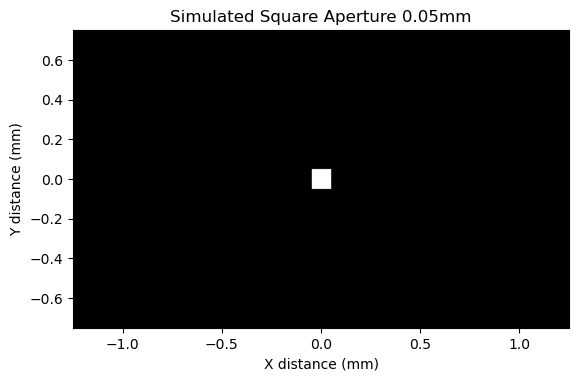

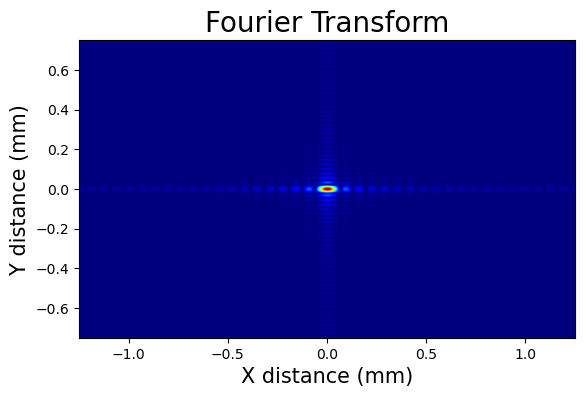

In [98]:
square_aperture = single_slit(.1,.05)    ## have to double x one as divide by two in single slit function

#plt.subplot(1,2,1)
plt.imshow(square_aperture,extent=[-1.25,1.25,-0.75,0.75])
plt.title('Simulated Square Aperture 0.05mm')
plt.xlabel('X distance (mm)')
plt.ylabel('Y distance (mm)')
plt.show()

# Calculate Fourier transform of single slit
ft = np.fft.ifftshift(square_aperture)   ## useful for visualizing a Fourier transform with the zero-frequency component in the middle of the spectrum. 
ft = np.fft.fft2(ft)                     ## calculates the 2D Fourier transform 
ft_ss_sq = np.fft.fftshift(ft)

#plt.subplot(1,2,2)
plt.imshow(np.abs(ft_ss_sq),extent=[-1.25,1.25,-0.75,0.75],cmap='jet')
plt.title('Fourier Transform',fontsize=20)
plt.xlabel('X distance (mm)',fontsize=15)
plt.ylabel('Y distance (mm)',fontsize=15)
plt.show()

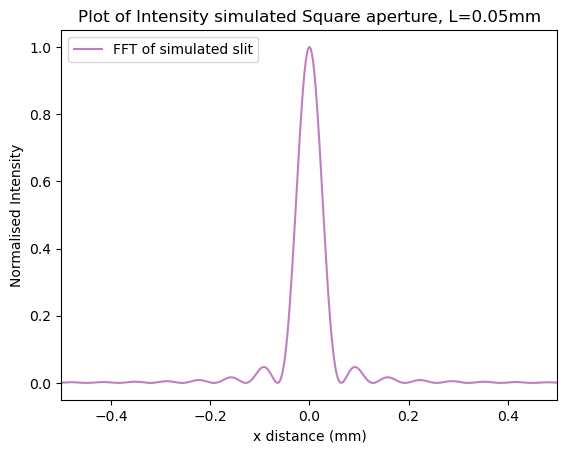

In [109]:
plt.plot(x,np.abs(ft_ss_sq)[500]**2/np.max(np.abs(ft_ss_sq)[500]**2),alpha=0.5,color='purple',label='FFT of simulated slit')
#plt.plot(hs,(sinc(hs,15,0.05)*sinc(np.linspace(-0.5,0.5,1400),15,.05))**2,color='teal',label='Analytical sinc function')

plt.title('Plot of Intensity simulated Square aperture, L=0.05mm')
plt.xlabel('x distance (mm)')
plt.ylabel('Normalised Intensity')
plt.xlim(-0.5,0.5)
plt.legend(loc=2)

## Section 1.4 - Circular apertures

In [113]:
## create circular aperture 
def circular_aperture(R):
    ## R = radius

    slit = (np.abs(X)**2<= R**2-np.abs(Y)**2)*(np.abs(Y)**2<=R**2- np.abs(X)**2)
    return slit.astype(float)    ## convert from boolean to numbers

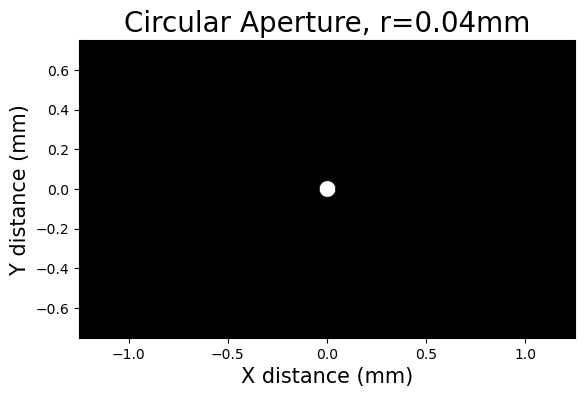

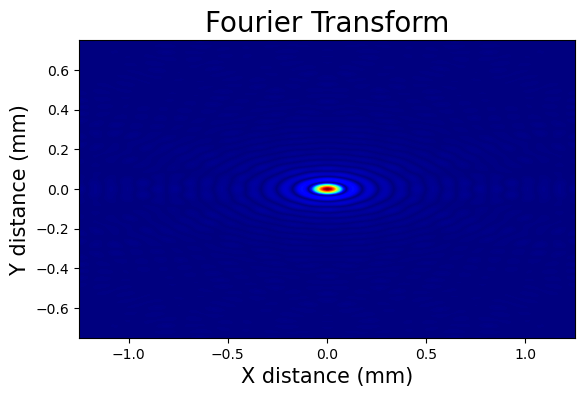

In [121]:
circle_aperture = circular_aperture(.04)

plt.title('Circular Aperture, r=0.04mm',fontsize=20)
plt.xlabel('X distance (mm)',fontsize=15)
plt.ylabel('Y distance (mm)',fontsize=15)
plt.imshow(circle_aperture,extent=[-1.25,1.25,-0.75,0.75])
plt.show()

ft = np.fft.ifftshift(circle_aperture)   ##useful for visualizing a Fourier transform with the zero-frequency component in the middle of the spectrum. 
ft = np.fft.fft2(ft)        #calculates the 2D Fourier transform 
ft_ss_ci = np.fft.fftshift(ft)

plt.imshow(np.abs(ft_ss_ci),extent=[-1.25,1.25,-0.75,0.75],cmap='jet')
plt.title('Fourier Transform',fontsize=20)
plt.xlabel('X distance (mm)',fontsize=15)
plt.ylabel('Y distance (mm)',fontsize=15)
plt.show()

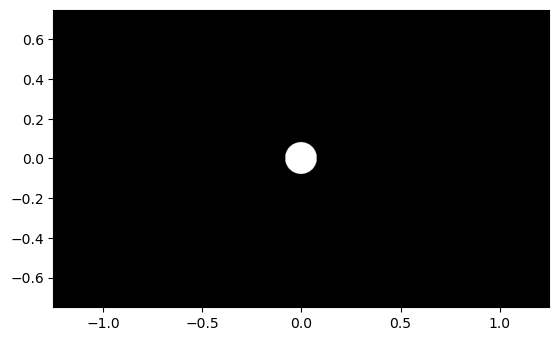

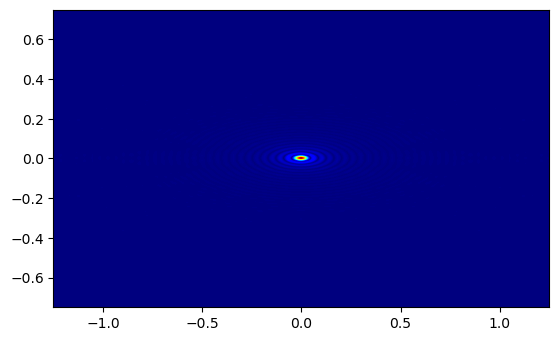

In [115]:
circle_aperture1 = circular_aperture(.08)

plt.imshow(circle_aperture1,extent=[-1.25,1.25,-0.75,0.75])
plt.show()

ft = np.fft.ifftshift(circle_aperture1)   ##useful for visualizing a Fourier transform with the zero-frequency component in the middle of the spectrum. 
ft = np.fft.fft2(ft)        #calculates the 2D Fourier transform 
ft_ss_ci1 = np.fft.fftshift(ft)

plt.imshow(np.abs(ft_ss_ci1),extent=[-1.25,1.25,-0.75,0.75],cmap='jet')
plt.show()

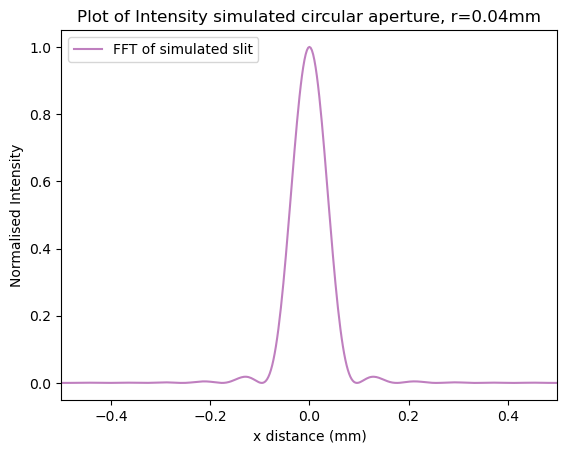

In [116]:
plt.plot(x,np.abs(ft_ss_ci)[500]**2/np.max(np.abs(ft_ss_ci)[500]**2),alpha=0.5,color='purple',label='FFT of simulated slit')

plt.title('Plot of Intensity simulated circular aperture, r=0.04mm')
plt.xlabel('x distance (mm)')
plt.ylabel('Normalised Intensity')
plt.xlim(-0.5,0.5)
plt.legend(loc=2)

In [117]:
## create hexagonal aperture 
def hexagon_aperture(L):
    ## L = side hexagon
    
    slit = (np.abs(X)<(L/2+L*np.cos(1.0472)-np.sqrt(L*3)*np.abs(Y)))*(np.abs(Y)<L*(np.sin(1.0472)))
    return slit.astype(float)    ## convert from boolean to numbers

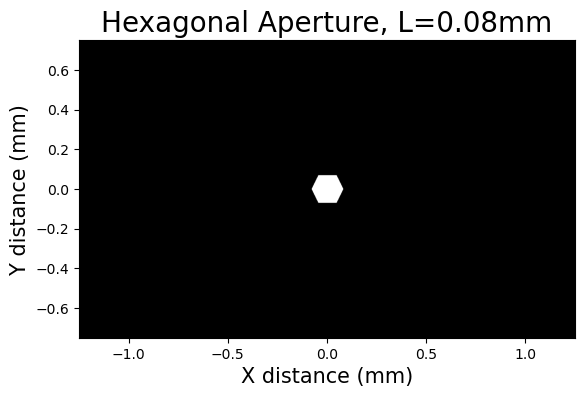

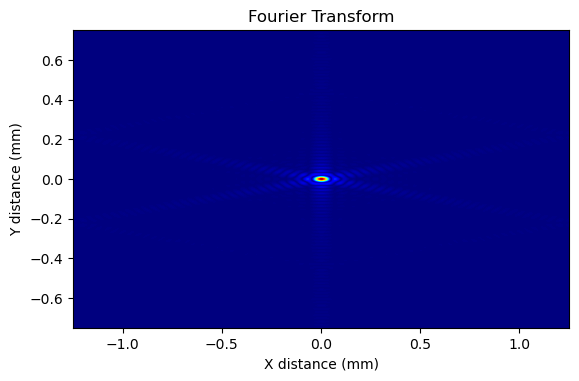

In [122]:
hex_aperture = hexagon_aperture(.08)

#plt.subplot(1,2,1)
plt.title('Hexagonal Aperture, L=0.08mm',fontsize=20)
plt.xlabel('X distance (mm)',fontsize=15)
plt.ylabel('Y distance (mm)',fontsize=15)
plt.imshow(hex_aperture,extent=[-1.25,1.25,-0.75,0.75])
plt.show()

ft = np.fft.ifftshift(hex_aperture)   ##useful for visualizing a Fourier transform with the zero-frequency component in the middle of the spectrum. 
ft = np.fft.fft2(ft)        #calculates the 2D Fourier transform 
ft_ss_hex= np.fft.fftshift(ft)

#plt.subplot(1,2,2)
plt.ylabel('Y distance (mm)')
plt.imshow(np.abs(ft_ss_hex),extent=[-1.25,1.25,-0.75,0.75],cmap='jet')
plt.title('Fourier Transform')
plt.xlabel('X distance (mm)')
plt.show()

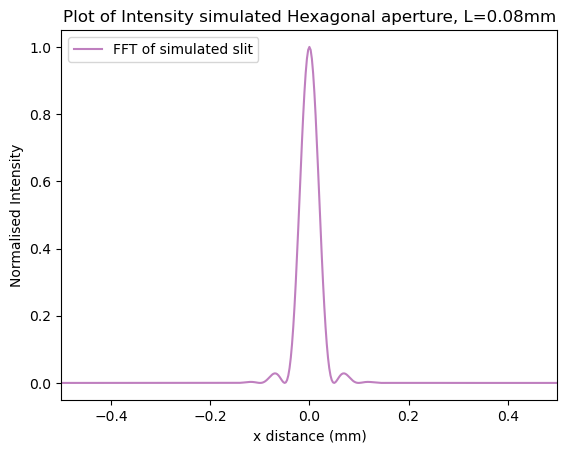

In [119]:
plt.plot(x,np.abs(ft_ss_hex)[500]**2/np.max(np.abs(ft_ss_hex)[500]**2),alpha=0.5,color='purple',label='FFT of simulated slit')

plt.title('Plot of Intensity simulated Hexagonal aperture, L=0.08mm')
plt.xlabel('x distance (mm)')
plt.ylabel('Normalised Intensity')
plt.xlim(-0.5,0.5)
plt.legend(loc=2)

# Section 2 - Optical filtering

## Section 2.1 - Load images of interest

In [39]:
pepper_image = imread(r"C:\Users\bethx\OneDrive\Documents\Final_Year_Modules\Advanced Lab 2\pepper_image.jpg")
grid_image = imread(r"C:\Users\bethx\OneDrive\Documents\Final_Year_Modules\Advanced Lab 2\Fourier_Optics\100_grid.png")
mountain_image  = imread(r"C:\Users\bethx\OneDrive\Documents\Final_Year_Modules\Advanced Lab 2\goat.JPG")

## Section 2.2 - Create Masks for filtering

In [40]:
def slit(image,mask_width,horz_or_vert):
    ## horz_or_vert = let light through (=1) in which direction // input options 'horz' or 'vert'
    d_image = rgb2gray(image)
    mask1 = np.zeros(d_image.shape)
    mask_centre = (d_image.shape[0]//2, d_image.shape[1]//2)
    
    #print(d_image.shape)
    if horz_or_vert == 'vert':
        mask1[:,mask_centre[1]-mask_width:mask_centre[1]+mask_width] = 1
    else:
        mask1[mask_centre[0]-mask_width:mask_centre[0]+mask_width] = 1

    return mask1

In [41]:
def filter_mask(image,mask_width,start_as,mask_value):
    ## make mask to block high or low spatial filters  
    ## start_as = mask_low or mask_high (sets array as zeros or ones)
    ## mask_value = 0 or 1 (0 for low, 1 for high)
    d_image = rgb2gray(image)
        
    if start_as == 'mask_low':
        mask2 = np.ones(d_image.shape)
    else:
        mask2 = np.zeros(d_image.shape)

    mask_centre = (d_image.shape[0]//2, d_image.shape[1]//2)
    
    mask2[mask_centre[0]-mask_width:mask_centre[0]+mask_width,
    mask_centre[1]-mask_width:mask_centre[1]+mask_width] = mask_value
    #print(mask2.shape)
    
    return mask2

## Section 2.3 - Define Functions to FT images and apply masks

In [57]:
def ft_image(image):
    grey_image = rgb2gray(image)      ## greyscale image
    fourier_image = np.fft.fftshift(np.fft.fft2(grey_image))  ### ft image
    
    plt.subplot(1,2,1)
    plt.title('Greyscaled image')
    plt.imshow(grey_image, cmap='gray')
    
    plt.subplot(1,2,2)    
    plt.title('2-D Fourier Transform (Log Amp)')
    plt.imshow(np.log(abs(fourier_image)), cmap='gray')
    return fourier_image

In [58]:
def apply_mask(Mask,fft_of_image):
    ## apply mask
    masked_image = Mask*(fft_of_image)
    ## show mask
    plt.subplot(1, 2, 1)
    plt.title('Mask')
    plt.imshow(np.log(abs(masked_image)), cmap='gray')
    
    ## get inverse transform
    inv_fshift = np.fft.ifftshift(masked_image)    ## shift back to centre
    filtered_image = np.fft.ifft2(inv_fshift)      ## inverse transform
    filtered_image = np.abs(filtered_image)   

    plt.subplot(1, 2, 2)
    plt.title('Filtered Image')
    plt.imshow(np.log(abs(filtered_image)), cmap='gray');
    return filtered_image

## Section 2.4 - Filter Images!

### Section 2.41 - Grid

In [59]:
horz_mask = slit(grid_image,10,'horz')
vert_mask = slit(grid_image,10,'vert')

In [60]:
high_filter = filter_mask(grid_image,10,'mask_high',1)

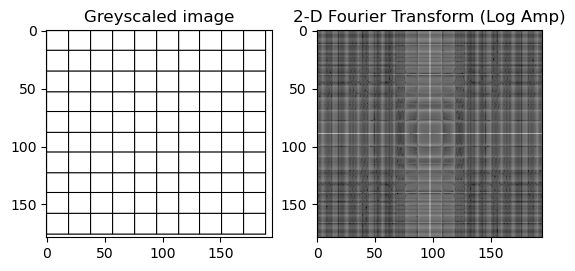

In [61]:
ft_grid = ft_image(grid_image)

C:\Users\bethx\AppData\Local\Temp\ipykernel_44792\2391809478.py:7: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(masked_image)), cmap='gray')


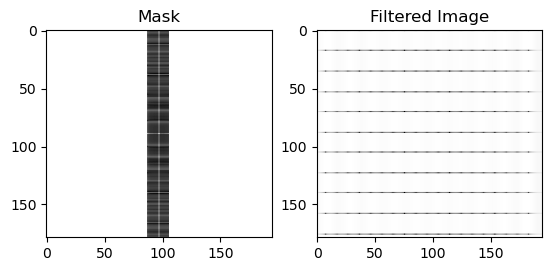

In [62]:
vertical_filtered = apply_mask(vert_mask,ft_grid)

C:\Users\bethx\AppData\Local\Temp\ipykernel_44792\2391809478.py:7: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(masked_image)), cmap='gray')


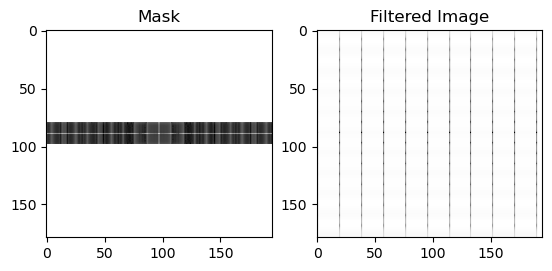

In [63]:
vertical_filtered = apply_mask(horz_mask,ft_grid)

C:\Users\bethx\AppData\Local\Temp\ipykernel_44792\2391809478.py:7: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(masked_image)), cmap='gray')


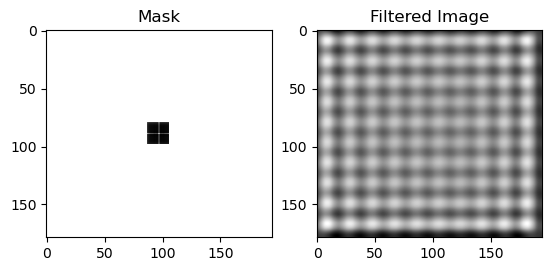

In [64]:
high_filtered = apply_mask(high_filter,ft_grid)

## Section 2.4 - High and Low pass filtering - Pepper

### Section 2.42 - Pepper!

In [55]:
filter_high_freq = filter_mask(pepper_image,50,'mask_high',1)
filter_low_freq = filter_mask(pepper_image,30,'mask_low',0)

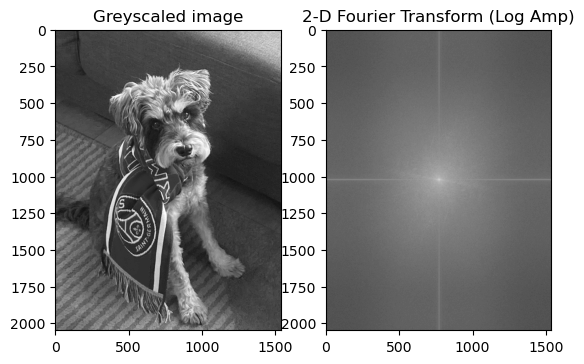

In [65]:
ft_pepper = ft_image(pepper_image)

C:\Users\bethx\AppData\Local\Temp\ipykernel_44792\2391809478.py:7: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(masked_image)), cmap='gray')


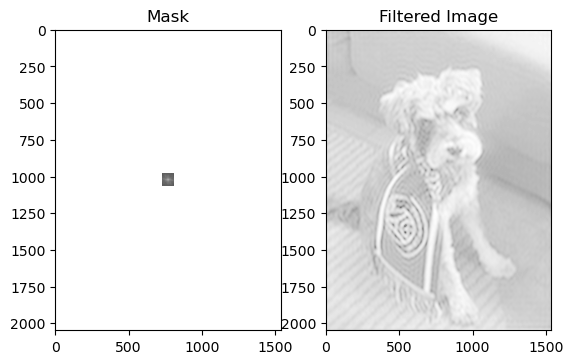

In [66]:
high_freq_filtered = apply_mask(filter_high_freq,ft_pepper)

C:\Users\bethx\AppData\Local\Temp\ipykernel_44792\2391809478.py:7: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(masked_image)), cmap='gray')


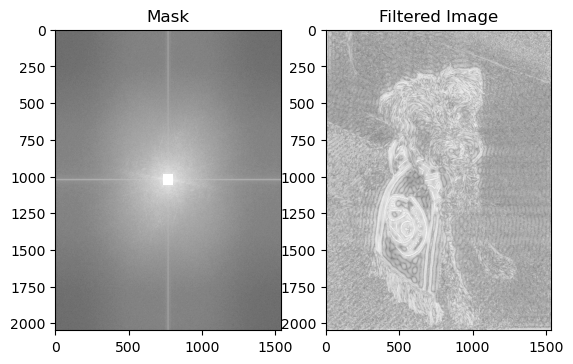

In [67]:
low_freq_filtered = apply_mask(filter_low_freq,ft_pepper)

### Section 2.43 - Mountain

In [866]:
filter_high_freq_m = filter_mask(mountain_image,50,'mask_high',1)
filter_low_freq_m = filter_mask(mountain_image,30,'mask_low',0)

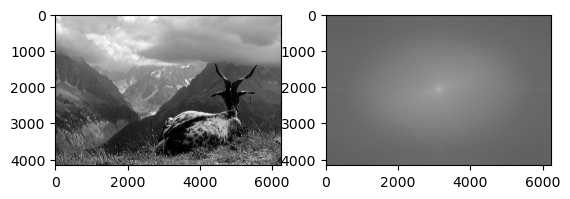

In [840]:
ft_mountain = ft_image(mountain_image)

C:\Users\bethx\AppData\Local\Temp\ipykernel_18272\4067596044.py:6: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(masked_image)), cmap='gray')


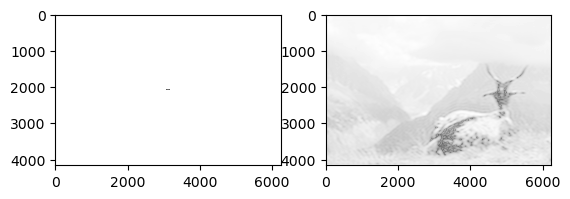

In [841]:
high_freq_filtered_m = apply_mask(filter_high_freq_m,ft_mountain)

C:\Users\bethx\AppData\Local\Temp\ipykernel_18272\4067596044.py:6: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(masked_image)), cmap='gray')


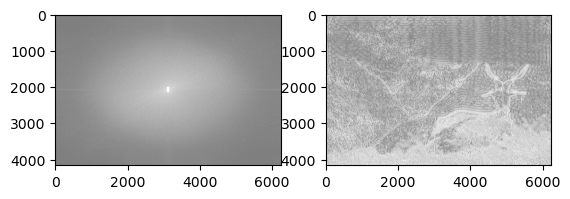

In [842]:
low_freq_filtered_m = apply_mask(filter_low_freq_m,ft_mountain)

# Section 3 - Phase vs Amplitude

In [69]:
ampl = np.abs(ft_pepper)
phase = np.angle(ft_pepper)

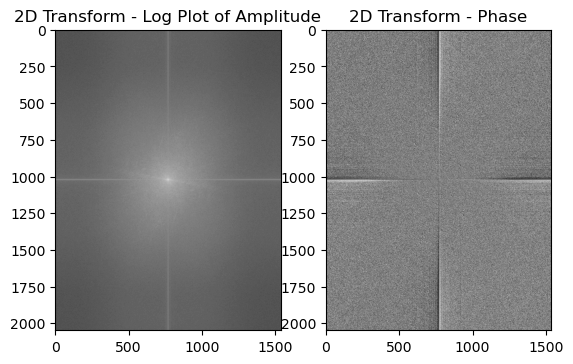

In [71]:
plt.subplot(1, 2, 1)
plt.title('2D Transform - Log Plot of Amplitude')
plt.imshow(np.log(ampl), cmap='gray')

plt.subplot(1,2,2)
plt.title('2D Transform - Phase')
plt.imshow(phase, cmap='gray')

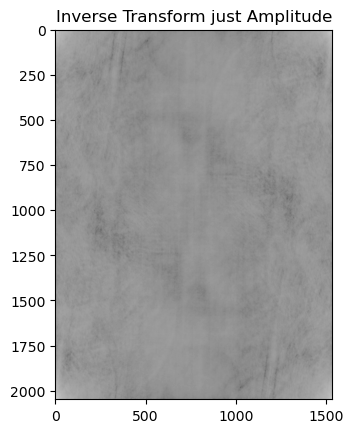

In [72]:
## shift back just amplitude

amp_backshift = np.fft.ifftshift(ampl)
amp_inv_transform = np.fft.ifft2((amp_backshift))

plt.title('Inverse Transform just Amplitude')
plt.imshow(np.log(np.abs(amp_inv_transform)), cmap='gray')

In [74]:
dims = ft_pepper.shape
print(dims)

(2048, 1536)


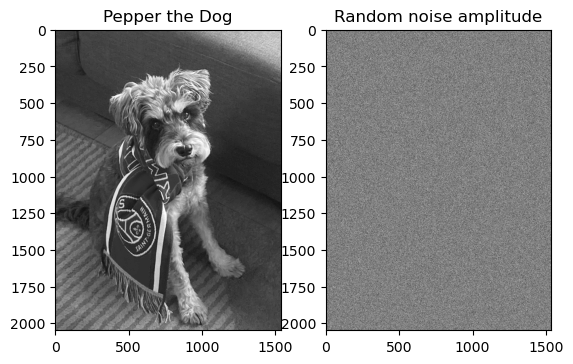

In [84]:
noise = np.random.randint(0, 256, (dims[0], dims[1]), dtype=np.uint8)

plt.subplot(1,2,1)
plt.title('Pepper the Dog')
plt.imshow(rgb2gray(pepper_image),cmap='gray')

plt.subplot(1,2,2)
plt.title('Random noise amplitude')
plt.imshow(noise,cmap='gray')

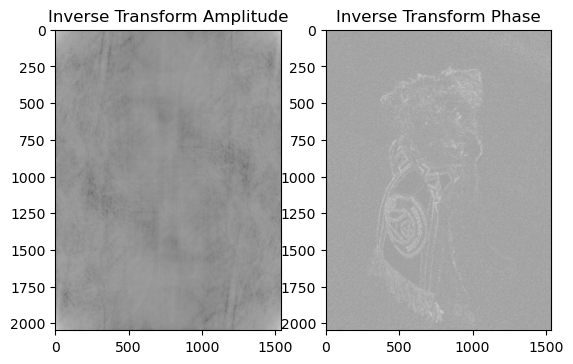

In [81]:
## shift back just amplitude

amp_backshift = np.fft.ifftshift(ampl)
amp_inv_transform = np.fft.ifft2((amp_backshift))

plt.subplot(1,2,1)
plt.title('Inverse Transform Amplitude')
plt.imshow(np.log(np.abs(amp_inv_transform)), cmap='gray')

## shift back phase w noise
phase_w_noise = noise*np.exp(1j*phase)
phase_backshift = np.fft.ifftshift(phase_w_noise)
phase_inv_transform = np.fft.ifft2((phase_backshift))

plt.subplot(1,2,2)
plt.title('Inverse Transform Phase')
plt.imshow(np.log(np.abs(phase_inv_transform)), cmap='gray')